# Analyzing my Stock's Profit-Loss against Nifty50

### Let's import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## Import P/L per day and respective Nifty50 data from google sheet
### Using gviz (Google Visualisation API) to query my google sheet and get required data

In [29]:
SheetId = "1hjytkvFX_qfK4DI21ZLxwBozYTUGFrSxfXriobRx29s"
SheetName ="P/L"
url= "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&Sheet={}".format(SheetId, SheetName)
df = pd.read_csv(url, usecols=["Date","P/L","Nifty 50"])
df

,Date,P/L,Nifty 50
0,5/16/2021,0.00,0.00
1,5/17/2021,9.60,14923.15
2,5/18/2021,53.54,15108.10
3,5/19/2021,47.93,15030.15
4,5/20/2021,32.98,14906.05
5,5/21/2021,79.93,15175.30
6,5/24/2021,90.25,15197.70
7,5/25/2021,87.79,15208.45
8,5/26/2021,114.11,15301.45
9,5/27/2021,122.82,15337.85


In [30]:
df.drop(df.index[:1], inplace=True)
df

,Date,P/L,Nifty 50
1,5/17/2021,9.60,14923.15
2,5/18/2021,53.54,15108.10
3,5/19/2021,47.93,15030.15
4,5/20/2021,32.98,14906.05
5,5/21/2021,79.93,15175.30
6,5/24/2021,90.25,15197.70
7,5/25/2021,87.79,15208.45
8,5/26/2021,114.11,15301.45
9,5/27/2021,122.82,15337.85
10,5/28/2021,133.13,15435.65


## Let's plot Profit/Loss and Nifty50 data

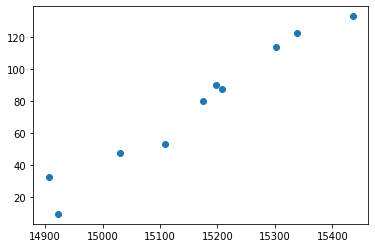

In [32]:
plt.scatter(df["Nifty 50"], df["P/L"])

## Finding Correlaton between my Stock's P/L and Nifty50
### As you can see correlation value is around 0.978, Which suggest me a stong relationship between these two

In [33]:
correlation = df["P/L"].corr(df["Nifty 50"])
correlation

0.9786608709640465

In [34]:
x = df["Nifty 50"]
X=x.values.reshape(-1,1)
X

array([[14923.15],
       [15108.1 ],
       [15030.15],
       [14906.05],
       [15175.3 ],
       [15197.7 ],
       [15208.45],
       [15301.45],
       [15337.85],
       [15435.65]])

In [35]:
y=df["P/L"]
Y=y.values
Y

array([  9.6 ,  53.54,  47.93,  32.98,  79.93,  90.25,  87.79, 114.11,
       122.82, 133.13])

## Let's use linear regression to predict future P/L

In [36]:
reg = linear_model.LinearRegression()

In [37]:
reg.fit(X,Y)

LinearRegression()

In [38]:
y_predict = reg.predict(X)

## Let's plot our regression line 

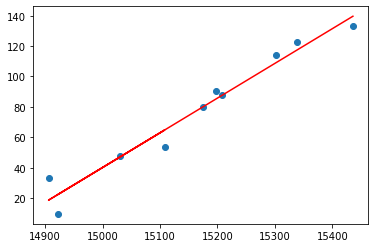

In [39]:
plt.scatter(df["Nifty 50"], df["P/L"])
plt.plot(X, y_predict, color="red")
plt.show()

In [41]:
## Q: Predict Profit/Loss at Nifty50 = 15500
## A:

In [42]:
Nifty_50 = [[15500]]
y_15500 = reg.predict(Nifty_50)
y_15500

array([154.33027144])